In [64]:
import numpy as np
import random
import skimage.data as da
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
from sklearn.cluster import KMeans

In [65]:
# TODO: load images from absalon
image = da.camera()
shape = image.shape
reshaped = image.reshape(-1, 1)
print(image.shape)

(512, 512)


In [66]:
def lloyd(img, k):
    
    kmeans = KMeans(n_clusters=k).fit(img)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    image_flat = cluster_centers[cluster_labels]
    
    return image_flat.reshape(shape)

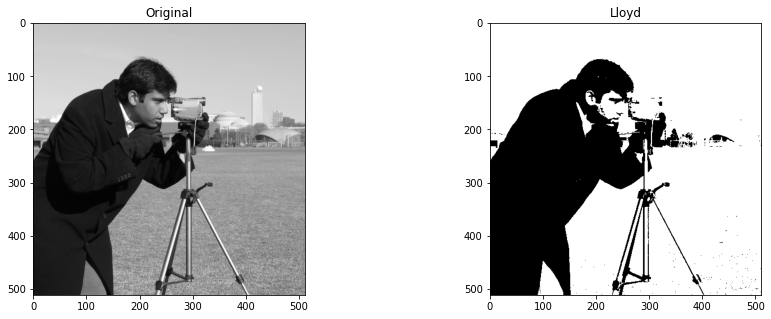

In [67]:
lloyd_img = lloyd(reshaped, 2)
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].imshow(image,cmap='gray')
ax[0].set_title('Original')
# NOTE: centroids of image are the mean of the colors instead of 1 and 0

ax[1].imshow(lloyd_img,cmap='gray')
ax[1].set_title('Lloyd')
plt.show()

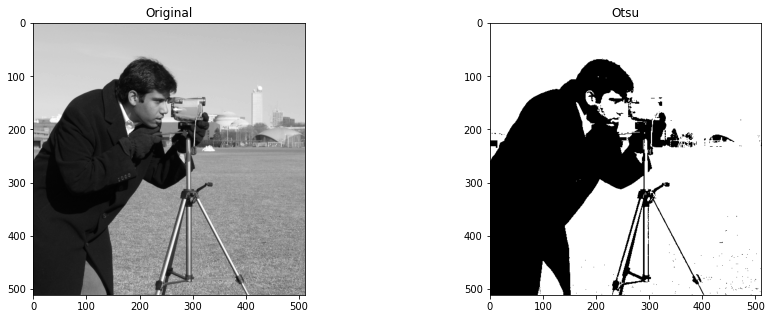

In [68]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(image)
otsu = image > thresh

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].imshow(image,cmap='gray')
ax[0].set_title('Original')
# outputs of otsu are either true or false

ax[1].imshow(otsu,cmap='gray')
ax[1].set_title('Otsu')
plt.show()

In [61]:
from collections import Counter

# most common function taken from:
# https://stackoverflow.com/questions/1518522/find-the-most-common-element-in-a-list
def most_common(lst):
    return max(set(lst), key=lst.count)

def clean(img, num_pix):
    
    # initialize an emtpy output matrix in the same shape as input image
    output = np.zeros((img.shape[0], img.shape[1]))
    
    # iter over the emtpy output image and fill in the values
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            # TBD: what to do with the edges?
            if i == 0 or i == img.shape[0]-1 or j == 0 or j == img.shape[1]-1:
                continue
            
            else:
                # initialize the temp list with the pixel values to always have
                # an odd number of pixel (for later picking the most frequent)
                change_list = [img[i, j]]
                
                # append the boardering pixels values to the list
                change_list.append(img[i-1][j])
                change_list.append(img[i][j-1])
                change_list.append(img[i+1][j])
                change_list.append(img[i][j+1])
                
                # if we want to look at all boardering pixels,
                # append those to the temp list, too
                if num_pix == 8:
                    change_list.append(img[i-1][j-1])
                    change_list.append(img[i-1][j-1])
                    change_list.append(img[i+1][j+1])
                    change_list.append(img[i+1][j+1])
                    
                # assign the output images pixel value 
                # the most frequent value over all the values of our list
                output[i, j] = most_common(change_list)

    return output

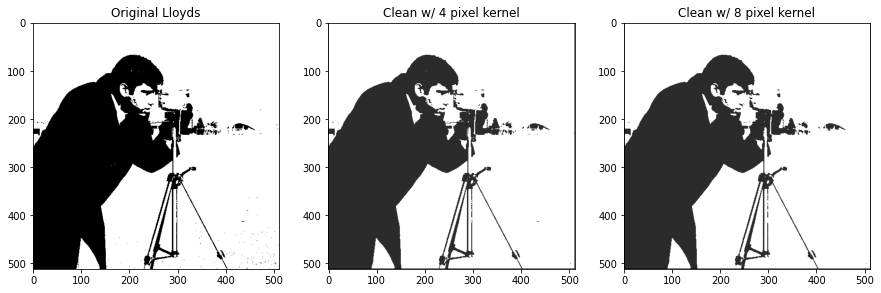

In [62]:
cleaned_4 = clean(lloyd_img, 4)
cleaned_8 = clean(lloyd_img, 8)

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(lloyd_img,cmap='gray')
ax[0].set_title('Original Lloyds')

ax[1].imshow(cleaned_4,cmap='gray')
ax[1].set_title('Clean w/ 4 pixel kernel')

ax[2].imshow(cleaned_8,cmap='gray')
ax[2].set_title('Clean w/ 8 pixel kernel')
plt.show()

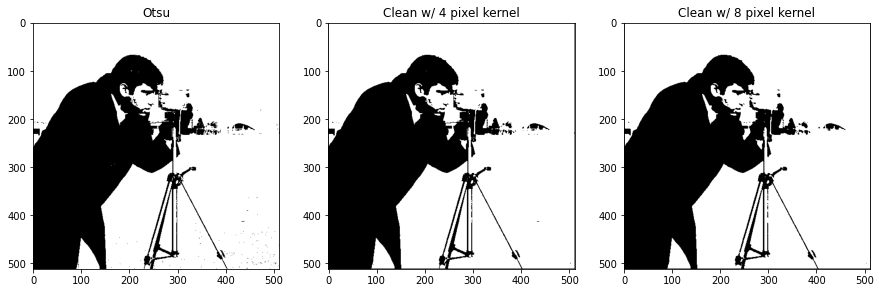

In [63]:
cleaned_4 = clean(otsu, 4)
cleaned_8 = clean(otsu, 8)

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(otsu,cmap='gray')
ax[0].set_title('Otsu')

ax[1].imshow(cleaned_4,cmap='gray')
ax[1].set_title('Clean w/ 4 pixel kernel')

ax[2].imshow(cleaned_8,cmap='gray')
ax[2].set_title('Clean w/ 8 pixel kernel')
plt.show()